In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## Orthogonalität der Sinus-Funktionen

In [2]:
x = sp.symbols("x")
L = sp.symbols("L", positive=True)
m, n = sp.symbols("m n", integer=True, positive=True)#, negative=False)
pi = sp.pi

In [3]:
sp.integrate(sp.sin(n*pi*x/L) * sp.sin(m*pi*x/L), (x, 0, L)).simplify()

Piecewise((0, Ne(m, n)), (L/2, True))

Wie sieht es mit dem Cosinus aus?

In [4]:
sp.integrate(sp.cos(n*pi*x/L) * sp.cos(m*pi*x/L), (x, 0, L)).simplify()

Piecewise((0, Ne(m, n)), (L/2, True))

## Numerisch

In [5]:
import scipy as sci
from scipy.integrate import quad

pi = np.pi

m = 3
n = 3
L = 10

def f(x):
    return np.sin(m*x*pi/L) * np.sin(n*x*pi/L)

I = quad(f, 0, L, epsabs=1.e-12)
I

(5.0, 5.551115123125783e-14)

### Divergente Integrale

In [6]:
x = sp.symbols("x")
sp.integrate(1/x, (x, 0, 1))

oo

In [7]:
g = lambda x: 1/x
g(2)

0.5

In [8]:
quad(lambda x: 1/x, 0, 1)

/var/folders/dv/w1w940x57rj_6l3skgv63gqc0000gn/T/ipykernel_27702/1027505703.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(lambda x: 1/x, 0, 1)


(41.67684067538809, 9.35056037314051)

### Uneigentliche Integrale
`sympy.oo` ist unendlich.

In [9]:
sp.integrate(1/(1+x*x), (x, -sp.oo, sp.oo))

pi

In [10]:
quad(lambda x: 1/(1+x*x), -np.Inf, np.Inf)

(3.141592653589793, 5.155583041103855e-10)

## Lösung der Schwingungsgleichung für gegebene Anfangsbedingung

Saite soll nahe dem linken Rand an der Position $x_0$ angehoben werden. Anfangsbedingung:

In [21]:
x = sp.symbols("x")
L = 10
x0 = 1

In [22]:
u0 = sp.Piecewise((x/x0, x<x0), ((L-x)/(L-x0), True))

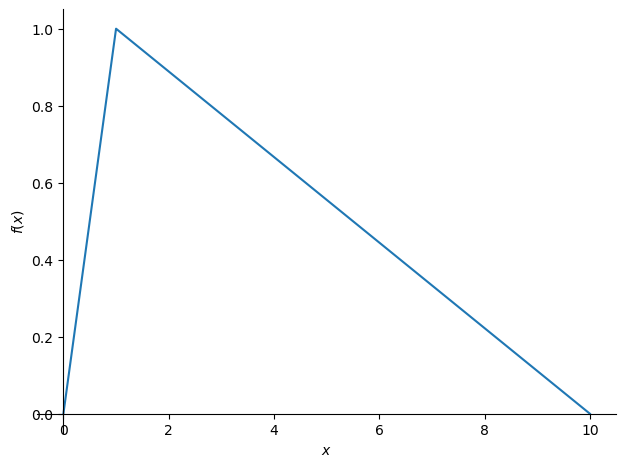

In [23]:
sp.plot(u0, (x, 0, L))

In [28]:
sp.integrate(u0 * sp.sin(x), x)

Piecewise((-x*cos(x) + sin(x), x < 1), (x*cos(x)/9 - sin(x)/9 - 10*cos(x)/9 + 10*sin(1)/9, True))

In [27]:
sp.integrate(x*sp.sin(x),x)

-x*cos(x) + sin(x)

Eigenfunktionen:

In [30]:
pi = sp.pi
def eigenfunc(n):
    return sp.sin(n*pi*x/L)

eig1 = eigenfunc(1)
eig1

sin(pi*x/10)

Test, ob es Eigenfunktion von $\frac{\partial^2}{\partial x^2}$ ist:

In [32]:
sp.diff(eig1, x, x)

-pi**2*sin(pi*x/10)/100

In [33]:
sp.diff(eig1, x, 2)

-pi**2*sin(pi*x/10)/100

In [38]:
eig1.diff(x, 2)/eig1

-pi**2/100

Berechnung der ersten 10 Fourierkoeffizienten:

In [67]:
base = [eigenfunc(n) for n in range(1, 21)]
base

[sin(pi*x/10),
 sin(pi*x/5),
 sin(3*pi*x/10),
 sin(2*pi*x/5),
 sin(pi*x/2),
 sin(3*pi*x/5),
 sin(7*pi*x/10),
 sin(4*pi*x/5),
 sin(9*pi*x/10),
 sin(pi*x),
 sin(11*pi*x/10),
 sin(6*pi*x/5),
 sin(13*pi*x/10),
 sin(7*pi*x/5),
 sin(3*pi*x/2),
 sin(8*pi*x/5),
 sin(17*pi*x/10),
 sin(9*pi*x/5),
 sin(19*pi*x/10),
 sin(2*pi*x)]

In [82]:
fourier_coeffs = [ sp.Rational(2,L)*sp.integrate(u0 * b, (x, 0, L)) for b in base]

In [84]:
fourier_coeffs

[200*(-1/4 + sqrt(5)/4)/(9*pi**2),
 50*sqrt(5/8 - sqrt(5)/8)/(9*pi**2),
 200*(1/4 + sqrt(5)/4)/(81*pi**2),
 25*sqrt(sqrt(5)/8 + 5/8)/(18*pi**2),
 8/(9*pi**2),
 50*sqrt(sqrt(5)/8 + 5/8)/(81*pi**2),
 200*(1/4 + sqrt(5)/4)/(441*pi**2),
 25*sqrt(5/8 - sqrt(5)/8)/(72*pi**2),
 200*(-1/4 + sqrt(5)/4)/(729*pi**2),
 0,
 200*(1/4 - sqrt(5)/4)/(1089*pi**2),
 -25*sqrt(5/8 - sqrt(5)/8)/(162*pi**2),
 200*(-sqrt(5)/4 - 1/4)/(1521*pi**2),
 -50*sqrt(sqrt(5)/8 + 5/8)/(441*pi**2),
 -8/(81*pi**2),
 -25*sqrt(sqrt(5)/8 + 5/8)/(288*pi**2),
 200*(-sqrt(5)/4 - 1/4)/(2601*pi**2),
 -50*sqrt(5/8 - sqrt(5)/8)/(729*pi**2),
 200*(1/4 - sqrt(5)/4)/(3249*pi**2),
 0]

In [85]:
f = 0
for c, func in zip(fourier_coeffs, base):
    f += c*func
f

200*(-1/4 + sqrt(5)/4)*sin(pi*x/10)/(9*pi**2) + 50*sqrt(5/8 - sqrt(5)/8)*sin(pi*x/5)/(9*pi**2) + 200*(1/4 + sqrt(5)/4)*sin(3*pi*x/10)/(81*pi**2) + 25*sqrt(sqrt(5)/8 + 5/8)*sin(2*pi*x/5)/(18*pi**2) + 8*sin(pi*x/2)/(9*pi**2) + 50*sqrt(sqrt(5)/8 + 5/8)*sin(3*pi*x/5)/(81*pi**2) + 200*(1/4 + sqrt(5)/4)*sin(7*pi*x/10)/(441*pi**2) + 25*sqrt(5/8 - sqrt(5)/8)*sin(4*pi*x/5)/(72*pi**2) + 200*(-1/4 + sqrt(5)/4)*sin(9*pi*x/10)/(729*pi**2) + 200*(1/4 - sqrt(5)/4)*sin(11*pi*x/10)/(1089*pi**2) - 25*sqrt(5/8 - sqrt(5)/8)*sin(6*pi*x/5)/(162*pi**2) + 200*(-sqrt(5)/4 - 1/4)*sin(13*pi*x/10)/(1521*pi**2) - 50*sqrt(sqrt(5)/8 + 5/8)*sin(7*pi*x/5)/(441*pi**2) - 8*sin(3*pi*x/2)/(81*pi**2) - 25*sqrt(sqrt(5)/8 + 5/8)*sin(8*pi*x/5)/(288*pi**2) + 200*(-sqrt(5)/4 - 1/4)*sin(17*pi*x/10)/(2601*pi**2) - 50*sqrt(5/8 - sqrt(5)/8)*sin(9*pi*x/5)/(729*pi**2) + 200*(1/4 - sqrt(5)/4)*sin(19*pi*x/10)/(3249*pi**2)

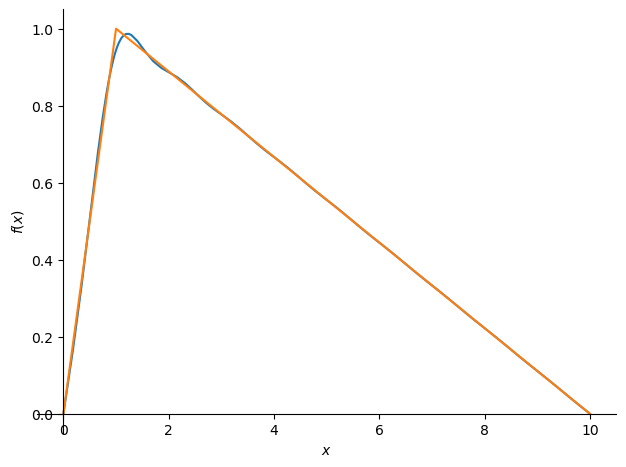

In [87]:
sp.plot(f, u0, (x, 0 , L))